In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.pyrDown(cv2.imread('data/p (12).jpg', cv2.IMREAD_UNCHANGED))
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# threshold image
ret, threshed_img = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

In [5]:
# find contours and get the external one
contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
arr = np.empty((0,2), int)
for c in contours:
    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    arr = np.append(arr, box, axis = 0)
    
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))
    #arr = np.append(arr, np.array(box), axis = 0)
    #arr = np.append(arr, np.array(box))

print(len(contours))

145


In [7]:
arr_split = np.split(arr, len(contours))
arr_mean = []

for x in arr_split:
    arr_mean = np.append(arr_mean, x.mean(axis=0))

arr_mean = np.split(arr_mean, len(contours))
arr_mean = np.int0(arr_mean)

In [8]:
color = (255,0,0)

for mean in arr_mean:
    x = mean[0]
    y = mean[1]
    cv2.line(img, (x,y), (x,y), color, 5)
    
cv2.imwrite("coordinate/12.png", img)    

cv2.imshow("contours", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
#좌표
arr_mean

array([[145, 403],
       [ 47, 390],
       [ 14, 383],
       [219, 377],
       [142, 365],
       [137, 367],
       [161, 359],
       [193, 357],
       [146, 350],
       [ 21, 344],
       [222, 336],
       [173, 330],
       [197, 324],
       [263, 307],
       [194, 301],
       [ 40, 299],
       [178, 297],
       [220, 288],
       [  8, 283],
       [ 29, 277],
       [291, 278],
       [185, 278],
       [277, 276],
       [172, 273],
       [156, 266],
       [ 82, 266],
       [  0, 264],
       [ 43, 275],
       [ 16, 264],
       [  9, 260],
       [ 98, 256],
       [190, 256],
       [133, 258],
       [ 45, 247],
       [  6, 246],
       [157, 246],
       [ 22, 234],
       [ 68, 242],
       [ 40, 229],
       [300, 231],
       [ 48, 223],
       [ 95, 221],
       [153, 220],
       [ 62, 214],
       [161, 210],
       [ 17, 213],
       [ 11, 218],
       [299, 202],
       [ 41, 197],
       [271, 196],
       [129, 193],
       [255, 184],
       [ 99,

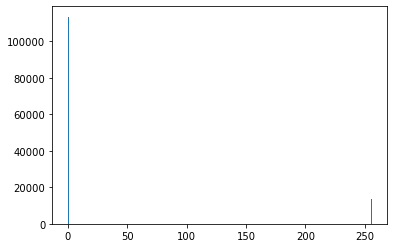

In [11]:
#면적
SIZE = 256

cv2.imshow("threshold", threshed_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

hist = cv2.calcHist(images = [threshed_img], 
                    channels = [0], 
                    mask = None,
                    histSize = [SIZE],
                    ranges = [0, SIZE])

plt.hist(threshed_img.ravel(), SIZE, [0, SIZE])
plt.show()

In [12]:
    height, width = threshed_img.shape[0], threshed_img.shape[1] 
    rectangle_area = height * width
    rate_w = hist[-1] / rectangle_area
    rate_b = hist[0] / rectangle_area

    ds_area = 100*100 # 전체 면적
    ds_S = ds_area*rate_w # 질병 면적
    st_S = ds_area*rate_b # 정상 면적
    
    print("피해지역면적 : ", ds_S, "\n정상지역면적 : ", st_S)

피해지역면적 :  [1073.86560171] 
정상지역면적 :  [8926.13439829]
